#Fourier Transform 
*by Maria Gabriela Pinheiro Claudino (mgpc)*


The image that we will use has periodic noise, therefore, we must use the notch filter to reconstruct the image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Calculating where apply the filter

In [ ]:
def NotchRejectFilter(shape, d0=9, u_k=0, v_k=0):
    M, N = shape
    H = np.zeros((M, N))
    
    for u in range(0, M):
        for v in range(0, N):
            D_uv = np.sqrt((u - M / 2 + u_k) ** 2 + (v - N / 2 + v_k) ** 2)
            D_muv = np.sqrt((u - M / 2 - u_k) ** 2 + (v - N / 2 - v_k) ** 2)

            if D_uv <= d0 or D_muv <= d0:
                H[u, v] = 0.0
            else:
                H[u, v] = 1.0

    return H

loading the image

In [ ]:
img = cv2.imread('moon.tif', 0)

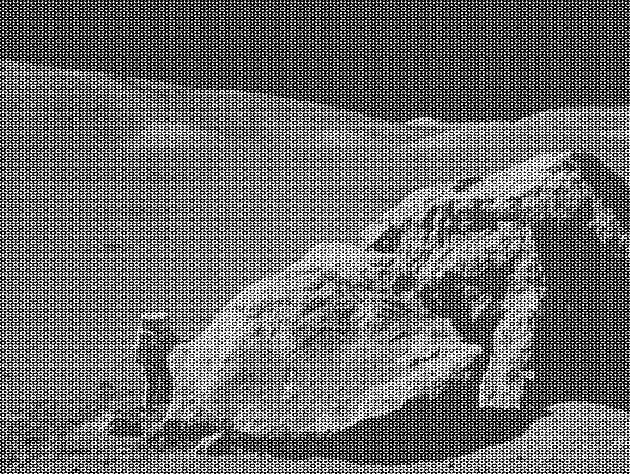

In [ ]:
cv2_imshow(img)

Shifting zero frequency component to the center of the spectrum.

In [ ]:
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

We must use the coordinates of the points that we want to apply the function.

In [ ]:
img_shape = img.shape

H1 = NotchRejectFilter(img_shape, 4, 38, 30)
H2 = NotchRejectFilter(img_shape, 4, -42, 27)
H3 = NotchRejectFilter(img_shape, 2, 80, 30)
H4 = NotchRejectFilter(img_shape, 2, -82, 28)

NotchFilter = H1*H2*H3*H4
NotchRejectCenter = fshift * NotchFilter 
NotchReject = np.fft.ifftshift(NotchRejectCenter)
inverse_NotchReject = np.fft.ifft2(NotchReject)

Result = np.abs(inverse_NotchReject)

(I didn't find the correct coordinates for the moon, but this one is for the car)

Magnitude spectrum

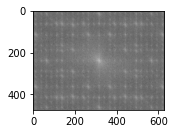

In [ ]:
plt.subplot(221)
plt.imshow(magnitude_spectrum, cmap='gray')

Notch Reject Filter

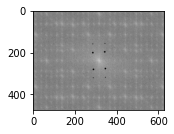

In [ ]:
plt.subplot(223)
plt.imshow(magnitude_spectrum*NotchFilter, "gray") 

Result

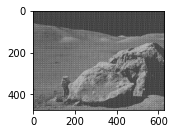

In [ ]:
plt.subplot(224)
plt.imshow(Result, "gray") 

If this model was applied to the car image, we would have this result: 

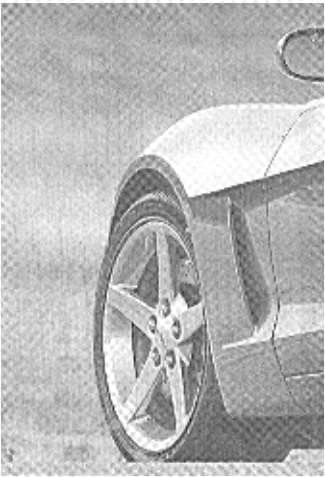

In [ ]:
cv2_imshow(Result)